# NER using SciKitLearn Library

In [ ]:
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#AT/TA skip
drive.mount('/content/drive')

In [ ]:
#AT/TA skip
%cd  /content/drive/Shared\ drives/256Group10/ASKus

In [29]:
#source https://towardsdatascience.com/named-entity-recognition-and-classification-with-scikit-learn-f05372f07ba2

import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import seaborn as sn
# import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('https://raw.githubusercontent.com/ajag408/ASKus/main/data/train.csv')
train.head()

,Id,pub_title,dataset_title,dataset_label,cleaned_label
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study


,Id,pub_title,dataset_label,cleaned_label
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,national education longitudinal study
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,national education longitudinal study
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,national education longitudinal study
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,national education longitudinal study
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,national education longitudinal study


,Id,pub_title,dataset_title,dataset_label,cleaned_label
0,d0fa7568-7d8e-4db9-870f-f9c6f668c17b,The Impact of Dual Enrollment on College Degre...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
1,2f26f645-3dec-485d-b68d-f013c9e05e60,Educational Attainment of High School Dropouts...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
2,c5d5cd2c-59de-4f29-bbb1-6a88c7b52f29,Differences in Outcomes for Female and Male St...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
3,5c9a3bc9-41ba-4574-ad71-e25c1442c8af,Stepping Stone and Option Value in a Model of ...,National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study
4,c754dec7-c5a3-4337-9892-c02158475064,"Parental Effort, School Resources, and Student...",National Education Longitudinal Study,National Education Longitudinal Study,national education longitudinal study


['ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI'
 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI'
 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI'
 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI'
 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI'
 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI'
 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI'
 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI'
 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI'
 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI'
 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI'
 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI'
 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI'
 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI' 'ADNI'
 'ADNI

In [28]:
train.groupby('dataset_label').size().reset_index(name='counts')

,dataset_label,counts
0,2019-nCoV complete genome sequences,1
1,2019-nCoV genome sequence,7
2,2019-nCoV genome sequences,4
3,ADNI,3673
4,ANSS Comprehensive Catalog,15
...,...,...
125,genome sequence of COVID-19,7
126,genome sequence of SARS-CoV-2,222
127,genome sequences of 2019-nCoV,12
128,genome sequences of COVID-19,8


<AxesSubplot:title={'center':'Confusion Matrix'}>

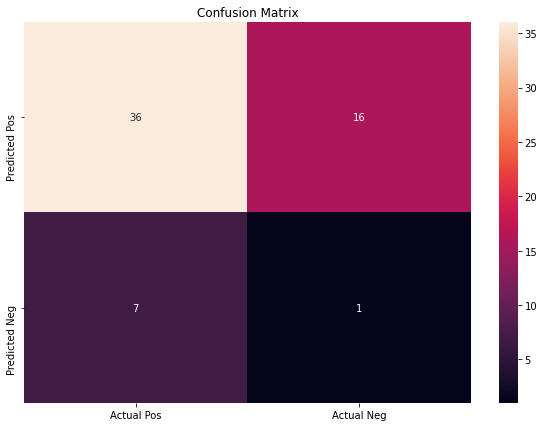

In [34]:
confusionMatrix = [[36, 16],[7, 1]]
df_cm = pd.DataFrame(confusionMatrix, index = [i for i in ("Predicted Pos", "Predicted Neg")],
                  columns = [i for i in ("Actual Pos", "Actual Neg")])
plt.figure(figsize = (10,7))
plt.title("Confusion Matrix")
sn.heatmap(df_cm, annot=True)